# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Spring 2021
- Instructor:  Davis Buenger
- Section: Tuesday/Thursday 5:30 PM
- Student Name: Xuecheng Liu
- Student Email: liu.6765@osu.edu
- Student ID: 500244459



***
# Section: Overview
- This lab aims to explore a particular dataset and perform some exploratory data analysis techniques.
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

***
# Section: 1 - Business Understanding
The data is pulled from the website "Our world in data", and is about Coronavirus Source Data which is published by Hannah Ritchie. This data relies on data from Jhon's Hopkins University.<br>
Each row represent the situation of COVID-19 cases in a particular location in a certain day. Successive rows represent how the cases change day by day for a particular location.<br>
The data is collected to order to allow millions of people around the world to track the evolution of this pandemic and perform certain analysis in order to better understand the worldwide trend. The data is collected multiple times per day from government,national and subnational agencies.<br>
For me, I would like to analyze the general trend of the growth of cases in each place and consider the reasons for such change, i.e. government policy. Also, it would be helpful to see how the cases across different places relate with each other.




***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class.
***

Firstly, I will read the data and get a glance of what it looks like

In [206]:
df = pd.read_excel('ALTERED owid-covid-data.xlsx', sheet_name='ALTERED owid-covid-data')

In [62]:
df.head()

,RECID,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,NEW_CASE_TREND
0,1,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
1,2,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
2,3,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
3,4,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
4,5,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN


***
## Section: 2.1 - Describe the meaning and type of data for each attribute.
***

I will list all the attributes and then look at them one by one.

In [34]:
df.columns.value_counts()

iso_code                           1
new_cases_per_million              1
new_deaths_smoothed_per_million    1
new_cases_smoothed                 1
positive_rate                      1
population_density                 1
extreme_poverty                    1
life_expectancy                    1
total_tests_per_thousand           1
RECID                              1
new_cases_smoothed_per_million     1
new_deaths_per_million             1
diabetes_prevalence                1
population                         1
median_age                         1
total_cases_per_million            1
gdp_per_capita                     1
new_deaths                         1
male_smokers                       1
NEW_CASE_TREND                     1
female_smokers                     1
aged_65_older                      1
new_deaths_smoothed                1
tests_per_case                     1
new_tests_smoothed                 1
new_tests_per_thousand             1
tests_units                        1
n

This part will be lengthy and will cover meaning and type of data for each attribute, so be patient. If the attribute name is exactly what it means, I will not talk about what it means.

<li>RECID is nominal.
<li>iso_code means currency code and it is Nominal. 
<li>Continent is Nominal. 
<li>Location is Nominal.
<li>date is Interval
<li>total_cases is ratio
<li>new_cases is ratio 
<li>new_cases_smoothed is ratio
<li>total_deaths is ratio
<li>new_deaths is ratio
<li>new_deaths_smoothed is ratio
<li>...<br>
As you can see, most of the attributes are ratio. In order to save space and not be redundant,I will talk about those which are not ratio variables.
<li>test_units: This is very unclear and includes missing values.I would label it as nominal
<li>NEW_CASE_TREND is Ordinal

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

I first exam the quantiles for each of the attribute. Some of the result might not make sense, such as nominal attributes, but it gives a good sense about the distribution of each attribute.

In [66]:
df.quantile(q = [0,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1])

,RECID,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0.00,1.00,0.00,-8261.00,-552.000,0.00,-1918.00,-232.143,0.00000,-2212.54500,-269.9780,0.000,-67.90100,-9.67800,-3743.00,1.0,0.00000,-0.39800,0.00,0.00000,1.53500,0.000,0.00,8.090000e+02,0.137,15.1,1.144,0.526,661.240,0.1,79.370,0.99,0.100,7.7,1.188,0.10,53.28
0.01,427.48,0.00,0.00,0.000,0.00,0.00,0.000,0.00000,0.00000,0.0000,0.000,0.00000,0.00000,6.00,44.0,0.00200,0.00000,3.00,0.00000,2.14600,0.000,0.00,4.999000e+03,3.078,16.4,1.307,0.617,752.788,0.1,85.755,1.91,0.200,8.5,2.117,0.30,54.33
0.10,4265.80,3.00,0.00,0.000,0.00,0.00,0.000,0.23100,0.00000,0.0000,0.000,0.00000,0.00000,235.00,5002.4,0.27430,0.01400,301.70,0.01500,5.78930,0.002,11.11,9.834000e+04,15.322,18.8,2.751,1.530,1803.987,0.2,113.151,3.67,0.800,16.5,8.704,0.70,62.42
0.25,10663.00,43.00,0.00,0.429,0.00,0.00,0.000,20.15325,0.00000,0.1070,0.000,0.00000,0.00000,959.00,43467.0,2.53775,0.06000,1064.00,0.06275,12.48300,0.008,38.89,1.402985e+06,39.497,23.5,3.556,2.142,5591.597,0.5,153.507,5.31,1.900,21.4,21.222,1.30,69.91
0.50,21325.00,847.00,9.00,13.143,15.00,0.00,0.143,250.03100,1.33900,2.6490,4.146,0.00000,0.01600,3212.00,175733.5,13.24350,0.27800,3610.50,0.29900,35.12250,0.027,64.81,8.654618e+06,88.125,31.4,6.991,4.419,14103.452,1.8,237.372,7.11,6.434,31.4,55.182,2.50,75.49
0.75,31987.00,8928.00,145.00,151.000,191.00,3.00,2.857,1614.35550,15.21200,16.8610,30.635,0.18700,0.26400,11732.00,676345.0,54.30000,0.80100,12332.50,0.79700,113.02600,0.078,80.56,3.107294e+07,214.243,39.7,14.799,9.473,32415.132,16.0,318.949,10.18,19.600,40.9,83.741,4.20,79.93
0.90,38384.20,64508.90,841.00,846.714,1834.70,21.00,21.143,4628.21410,60.92270,63.7752,144.525,1.21900,1.37340,30200.10,2009409.2,127.96190,1.68200,33580.20,1.59400,355.68050,0.171,89.35,8.433907e+07,450.419,43.1,19.202,12.930,46949.283,43.7,423.031,13.17,26.900,51.0,90.650,6.56,82.49
0.99,42222.52,1104507.03,26113.22,27801.429,53839.72,881.85,899.429,18362.44963,272.07533,246.0930,660.066,8.52148,7.81024,445872.05,28000299.9,455.74605,5.49252,356748.27,5.18723,2320.61804,0.458,100.00,1.439324e+09,7915.731,47.9,23.021,16.240,94277.965,77.1,597.029,22.02,37.700,76.1,98.999,13.05,84.97
1.00,42649.00,27609408.00,298039.00,270541.143,898087.00,10491.00,7456.571,526397.00000,4944.37600,882.9240,1237.551,215.38200,63.14000,1228189.00,93298521.0,778.96900,16.57400,1066782.00,12.50200,47299.00000,0.651,100.00,7.794799e+09,19347.500,48.2,27.049,18.493,116935.600,77.6,724.417,23.36,44.000,78.1,98.999,13.80,86.75


Then I count the values for each attribute, the result is showing below. This can help us to identify do we have any missing values for each attribute.

In [68]:
df.count()

RECID                              42649
iso_code                           42395
continent                          42141
location                           42649
date                               42649
total_cases                        42074
new_cases                          41884
new_cases_smoothed                 41101
total_deaths                       42074
new_deaths                         41884
new_deaths_smoothed                41101
total_cases_per_million            41820
new_cases_per_million              41820
new_cases_smoothed_per_million     41037
total_deaths_per_million           41820
new_deaths_per_million             41820
new_deaths_smoothed_per_million    41037
new_tests                          14330
total_tests                        14684
total_tests_per_thousand           14684
new_tests_per_thousand             14330
new_tests_smoothed                 16108
new_tests_smoothed_per_thousand    16108
tests_per_case                     14932
positive_rate   

Total cases and toal deaths across the world are two most interesting values for me.

In [73]:
df_new = df[df['location'] =='World']
display('total case',df_new['total_cases'].max())
display('total death',df_new['total_deaths'].max())

'total case'

27609408.0

'total death'

898087.0

Here is the total cases group by location.



In [75]:
df_new = df[['location','total_cases']].groupby('location').max()
display(df_new)

,total_cases
location,
Afghanistan,38520.0
Albania,10553.0
Algeria,46938.0
Andorra,1261.0
Angola,2981.0
...,...
Western Sahara,766.0
World,27609408.0
Yemen,1994.0


I used the table above as an concrete example to show the following basic statistics

In [78]:
display('count',df_new.shape[0])
display('quantile',df_new['total_cases'].quantile([0,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1]))
display('median',df_new['total_cases'].median())
display('mean',df_new['total_cases'].mean())
display('standard deviation',df_new['total_cases'].std())

'count'

212

'quantile'

0.00           3.0
0.01          13.0
0.10         145.0
0.25        1226.0
0.50        7149.0
0.75       54903.0
0.90      253474.0
0.99     4349322.5
1.00    27609408.0
Name: total_cases, dtype: float64

'median'

7149.0

'mean'

270146.44075829384

'standard deviation'

1990905.2965442843

***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

I would first exam whether a country with higher old population rate has more cases because older people can get infected more easily. I would choose the top 5 oldest countries and top 5 youngest countries.

In [156]:
# Find the oldest countries.
df_old = df.nlargest(5000, 'aged_70_older')
values = np.sort(df_old['aged_70_older'].unique())[::-1][0:5]

In [157]:
# get the top 5 oldest countries
location = []
for i in values:
  df_top = df[df['aged_70_older'] == i]
  location.append(df_top['location'].unique())

In [158]:
df_low = df.nsmallest(5000, 'aged_70_older')
values = np.sort(df_low['aged_70_older'].unique())[0:5]

In [159]:
for i in values:
  df_low = df[df['aged_70_older'] == i]
  location.append(df_low['location'].unique())

In [163]:
location

[array(['Japan'], dtype=object),
 array(['Italy'], dtype=object),
 array(['Germany'], dtype=object),
 array(['Portugal'], dtype=object),
 array(['Greece'], dtype=object),
 array(['United Arab Emirates'], dtype=object),
 array(['Qatar'], dtype=object),
 array(['Kuwait'], dtype=object),
 array(['Sierra Leone'], dtype=object),
 array(['Uganda'], dtype=object)]

In [164]:
# combine data for plotting
total_cases = []
for country in location:
  df2 = df[df['location']==country[0]]
  total_cases.append(df2['total_cases_per_million'].max())

In [165]:
total_cases

[575.016,
 4633.552,
 3025.329,
 5972.026,
 1135.176,
 7593.019,
 41852.304,
 21365.801,
 258.744,
 85.263]

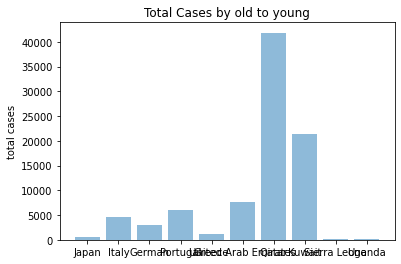

In [190]:
objects = ('Japan', 'Italy', 'German', 'Portugal', 'Greece', 'United Arab Emirates','Qatar','Kuwait','Sierra Leone','Uganda')
y_pos = np.arange(len(objects))
plt.bar(y_pos, total_cases, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('total cases')
plt.title('Total Cases by old to young')

plt.show()

We can see that Qatar and Kuwait have the highest cases with lower rate of old population. However, other countries with either higher or lower rate of old population all have low cases. Thus, we cannot infer any relationship between old population rate and total cases.

Next I would like to exam whether old country have higher death rate in order to determine whether covid-19 is more fatal to high-age group.

In [191]:
death_rate = []
for country in location:
  df2 = df[df['location']==country[0]]
  death_rate.append(df2['total_deaths_per_million'].max())

In [192]:
death_rate

[11.014,
 588.189,
 111.453,
 181.039,
 27.823,
 39.533,
 71.154,
 128.32,
 9.026,
 1.006]

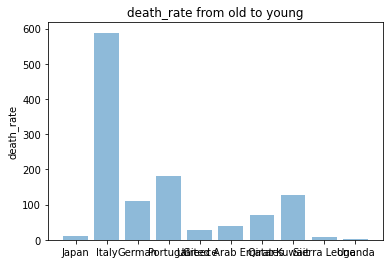

In [194]:
objects = ('Japan', 'Italy', 'German', 'Portugal', 'Greece', 'United Arab Emirates','Qatar','Kuwait','Sierra Leone','Uganda')
y_pos = np.arange(len(objects))
plt.bar(y_pos, death_rate, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('death_rate')
plt.title('death_rate from old to young')

plt.show()

As you can see, death rate is higher in countries with higher older population rate except. It is reasonable becuase Japanese is an outlier in such case due to their good habit in hygiene

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

As you can see in Section 2.2, lots of attributes have missing values. We are expected to have 42649 records for each attribute, such as handwashing_facilities.<br>
Also, there are datas with wrong value. For example, we have negative new cases within this dataset. We need to correct these values since they will beheave as outliers and will have a strong effect to the later modeling process

***
## Section: 2.5 - Explore the relationships among the attributes, excluding the class attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

I would like to continue exploration about the relation between high-age group and death rate

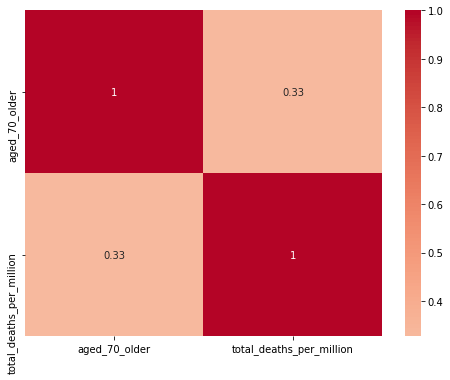

In [203]:
# set up new tables with location-death_rate and location-aged_70_older
df2 = df[['location','total_deaths_per_million', 'aged_70_older']].dropna()
dfx = df2[['location','total_deaths_per_million']]
dfy = df2[['location','aged_70_older']]

new_df1 = dfx.groupby("location")
deaths = new_df1['total_deaths_per_million'].max()
deaths = deaths.reset_index()

new_df2= dfy.groupby("location")
old = new_df2['aged_70_older'].max()
old = old.reset_index()

relation=pd.merge(left=old, right=deaths, left_on='location', right_on='location')
corr = relation[['aged_70_older', 'total_deaths_per_million']]
com = corr.corr().round(5)
plt.figure(figsize=(8,6))
sns.heatmap(data=com, annot=True, center=0.0, cmap='coolwarm')

These two atttributes have a correlation of 0.33, which is not very high.

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier visualizations or create new ones.
***

refer to earlier visualizations

***
# Section: 3 - Data Processing
- Based on the insights gleaned in the data understanding phase, determine what type of processing that you would like to do to create a final dataset to be used for future modeling.
- One of the final outputs of your program should be the creation of a dataset (can be in the format of a Python data frame) which has all of the attributes you would like to use for the modeling phase of a project, as well as dealing with any outliers, noise or missing values.
***

***
## Section: 3.1 - What attributes do you decide to keep or remove? Please justify.
***

I would like to remove attributes like handwashing_facilities which have a lot of missing values

***
## Section: 3.2 - Did you decide to implement any attribute transformations? If so, why?
***

I would not like to implement any attribute transformations since the dataset itself already have a lot of smoothed values. Also, most of the values have practical meaning such as total number of cases. It would hurt the data if we choose to transform the attributes.

***
## Section: 3.3 - Did you decide to create any new features? If so, why?
***

I would not like to create any new features since the dataset already have more than 40 attributes. When we create new features, we will need to data to fill in the gap. Also, it can increase the correlation among attributes

***
## Section: 3.4 - Implement any data cleaning steps previously identified.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

I will just drop some columns which have lots of missing values.

In [215]:
df3 = df.drop(['diabetes_prevalence','handwashing_facilities','female_smokers','male_smokers'],1)

The effect cannot be shown after this cleanning step since my previous parts did not use these bad attributes due to lots of missing value. I would still repeat what I did previously in order to follow instruction in this lab.

In [217]:
df_new = df3[['location','total_cases']].groupby('location').max()
display(df_new)

display('count',df_new.shape[0])
display('quantile',df_new['total_cases'].quantile([0,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1]))
display('median',df_new['total_cases'].median())
display('mean',df_new['total_cases'].mean())
display('standard deviation',df_new['total_cases'].std())

,total_cases
location,
Afghanistan,38520.0
Albania,10553.0
Algeria,46938.0
Andorra,1261.0
Angola,2981.0
...,...
Western Sahara,766.0
World,27609408.0
Yemen,1994.0


'count'

212

'quantile'

0.00           3.0
0.01          13.0
0.10         145.0
0.25        1226.0
0.50        7149.0
0.75       54903.0
0.90      253474.0
0.99     4349322.5
1.00    27609408.0
Name: total_cases, dtype: float64

'median'

7149.0

'mean'

270146.44075829384

'standard deviation'

1990905.2965442843

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? Identify and explain any interesting relationships between the class attribute and the other attributes. You may refer to earlier visualizations or create new ones.?
***

The data looks exhaustive and contains a lot of information. Looks very overwhelming at beginning.<br>
One lesson I learnt in this project is how ot manipulate data and visualize them in pandas. Also, I learnt that when doing analysis, I should avoid bad data, such as attribtue with missing values and utilize those good ones.<br>
I am happy to analyze the correlation between high-age group and death-rate becuase those two attributes sounds correlated intuitively and finally they are correlated.